In [30]:
#! -*- coding: UTF8 -*-
import os
os.chdir(os.getcwd())

## Import Module

In [31]:
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

## Import Data

In [33]:
df = pd.read_excel('process_data/part2_data.xlsx',sheet_name="before") #ตัวอย่าง
df.head()

,Year,Province,Province_year,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,...,Education,Human health activities,"Arts, entertainment and recreation",Other service activities,การค้าสินค้า (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี),การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),GPP Per capita (Baht)
0,2016,Bangkok,Bangkok2016,2478.697583,0.000000,600999.717208,38797.576723,21202.219085,102327.345832,1.028711e+06,...,77922.895829,80517.654809,53449.494361,131991.420761,99.08552,8.478077,53.50434,35.58677,68971313,543199.315
1,2016,Samut Prakan,Samut Prakan2016,2992.031993,7.878722,291876.560780,15972.097786,2536.561647,10409.125795,9.757568e+04,...,4104.432256,8766.355076,628.340130,12979.793243,99.08552,8.478077,53.50434,35.58677,68971313,338818.793
2,2016,Nonthaburi,Nonthaburi2016,5534.698033,52.791542,47300.939661,5547.681924,1995.396414,15052.653803,5.240348e+04,...,7697.056340,33768.803380,10502.476853,6352.508921,99.08552,8.478077,53.50434,35.58677,68971313,179146.765
3,2016,Pathum Thani,Pathum Thani2016,5789.250519,132.666192,185025.287023,9545.870133,2426.927374,11901.340333,5.314392e+04,...,11269.211920,5680.390849,959.164189,3066.806726,99.08552,8.478077,53.50434,35.58677,68971313,214452.231
4,2016,Phra Nakhon Si Ayutthaya,Phra Nakhon Si Ayutthaya2016,9195.681241,2261.213780,272229.302252,6750.108953,715.663477,4024.328038,4.419575e+04,...,5591.169343,3724.986958,239.011546,1671.193174,99.08552,8.478077,53.50434,35.58677,68971313,444803.565


<AxesSubplot:>

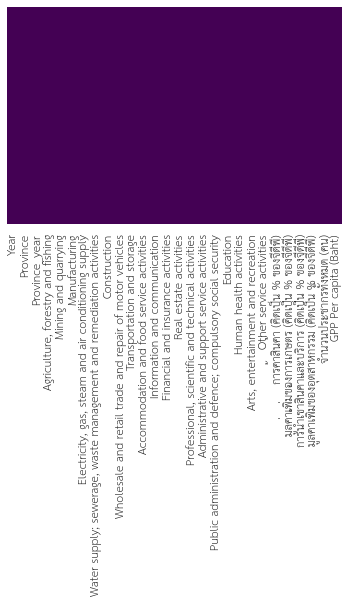

In [34]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [35]:
df2 = df.drop(["Province","Province_year","Year"],axis=1)
df2.head()

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,Education,Human health activities,"Arts, entertainment and recreation",Other service activities,การค้าสินค้า (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี),การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),GPP Per capita (Baht)
0,2478.697583,0.000000,600999.717208,38797.576723,21202.219085,102327.345832,1.028711e+06,362345.198298,375718.813255,261626.317057,...,77922.895829,80517.654809,53449.494361,131991.420761,99.08552,8.478077,53.50434,35.58677,68971313,543199.315
1,2992.031993,7.878722,291876.560780,15972.097786,2536.561647,10409.125795,9.757568e+04,163458.489329,9021.095235,4546.785332,...,4104.432256,8766.355076,628.340130,12979.793243,99.08552,8.478077,53.50434,35.58677,68971313,338818.793
2,5534.698033,52.791542,47300.939661,5547.681924,1995.396414,15052.653803,5.240348e+04,9907.985016,5265.414023,18720.504473,...,7697.056340,33768.803380,10502.476853,6352.508921,99.08552,8.478077,53.50434,35.58677,68971313,179146.765
3,5789.250519,132.666192,185025.287023,9545.870133,2426.927374,11901.340333,5.314392e+04,8397.959586,4184.691582,3582.759627,...,11269.211920,5680.390849,959.164189,3066.806726,99.08552,8.478077,53.50434,35.58677,68971313,214452.231
4,9195.681241,2261.213780,272229.302252,6750.108953,715.663477,4024.328038,4.419575e+04,12903.716664,2648.188052,1459.752491,...,5591.169343,3724.986958,239.011546,1671.193174,99.08552,8.478077,53.50434,35.58677,68971313,444803.565


In [36]:
df2.describe()

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,Education,Human health activities,"Arts, entertainment and recreation",Other service activities,การค้าสินค้า (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี),การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),GPP Per capita (Baht)
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,2.310000e+02,231.000000,231.000000,231.000000,...,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.00000,2.310000e+02,2.310000e+02
mean,16765.445493,5207.398758,54225.253861,5159.643940,824.859477,5221.243041,3.102804e+04,11852.097793,10534.712077,4701.768386,...,8198.267535,4242.252196,1188.887208,3019.913644,99.467639,8.356064,54.580857,35.11890,6.920319e+07,1.623546e+05
std,11528.640736,29875.539741,116256.988413,12482.984200,2702.332937,12374.286505,1.267275e+05,47329.396686,51981.650485,31297.338753,...,11082.594473,10256.320508,6890.816804,16033.344287,0.659636,0.125613,1.060634,0.34916,1.870912e+05,1.541406e+05
min,2413.932239,0.000000,648.396626,124.349588,25.605361,599.507815,1.291595e+03,227.748273,13.811347,99.192745,...,958.731979,591.429536,18.105142,88.634832,98.923618,8.183702,53.504340,34.75117,6.897131e+07,5.495652e+04
25%,8536.580139,143.466967,4142.994817,518.346280,122.585110,1796.918568,4.726639e+03,825.699699,242.956170,309.727089,...,3178.191591,1354.601424,91.502250,386.714905,98.923618,8.183702,53.504340,34.75117,6.897131e+07,7.518946e+04
50%,14002.533769,396.476974,7879.749099,1129.134655,209.046937,2555.478784,8.618965e+03,1690.664423,615.754467,508.874967,...,5185.165742,1968.212968,167.805959,619.060097,99.085520,8.406413,54.218590,35.01876,6.920982e+07,1.048120e+05
75%,20613.721165,1579.532881,30045.849915,2767.505692,561.155041,4779.895035,1.783786e+04,5017.696585,2795.784666,943.090193,...,9423.417524,3667.149633,323.421979,1120.115745,100.393779,8.478077,56.019640,35.58677,6.942845e+07,1.783091e+05
max,77846.992937,281799.846288,622671.598350,83220.164166,25573.612362,111787.301406,1.213150e+06,398967.935901,501607.813054,290158.506429,...,108512.205134,89052.404689,66329.644455,152761.139388,100.393779,8.478077,56.019640,35.58677,6.942845e+07,1.067449e+06


In [37]:
list1 = list(df2.columns.values)
list1

['Agriculture, forestry and fishing',
 'Mining and quarrying',
 'Manufacturing',
 'Electricity, gas, steam and air conditioning supply',
 'Water supply; sewerage, waste management and remediation activities',
 'Construction',
 'Wholesale and retail trade and repair of motor vehicles',
 'Transportation and storage',
 'Accommodation and food service activities',
 'Information and communication',
 'Financial and insurance activities',
 'Real estate activities',
 'Professional, scientific and technical activities',
 'Administrative and support service activities',
 'Public administration and defence; compulsory social security',
 'Education',
 'Human health activities',
 'Arts, entertainment and recreation',
 'Other service activities',
 'การค้าสินค้า (คิดเป็น % ของจีดีพี)',
 'มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี)',
 'การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี)',
 'มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี)',
 'จำนวนประชากรทั้งหมด (คน)',
 'GPP Per capita (Baht)']

## Cluster by K-Mean

#### ก่อนตัดปัจจัยที่ไม่ส่งผลออก

In [38]:
scaler = StandardScaler()
array_normalized = scaler.fit_transform(df2)
df_normalized = pd.DataFrame(array_normalized)
df_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-1.241931,-0.174682,4.713367,2.700555,7.557030,7.864451,7.889763,7.421481,7.040506,8.226977,...,6.305025,7.453067,7.600564,8.061423,-0.580545,0.973451,-1.017179,1.342896,-1.242096,2.476127
1,-1.197307,-0.174417,2.048629,0.868056,0.634792,0.420157,0.526264,3.210174,-0.029182,-0.004963,...,-0.370195,0.442062,-0.081524,0.622547,-0.580545,0.973451,-1.017179,1.342896,-1.242096,1.147312
2,-0.976276,-0.172911,-0.059690,0.031153,0.434099,0.796229,0.169039,-0.041165,-0.101589,0.448894,...,-0.045323,2.885116,1.354529,0.208305,-0.580545,0.973451,-1.017179,1.342896,-1.242096,0.109177
3,-0.954148,-0.170231,1.127537,0.352139,0.594134,0.541009,0.174894,-0.073139,-0.122424,-0.035832,...,0.277698,0.140524,-0.033410,0.002931,-0.580545,0.973451,-1.017179,1.342896,-1.242096,0.338722
4,-0.658031,-0.098829,1.879263,0.127687,-0.040496,-0.096936,0.104131,0.022267,-0.152047,-0.103813,...,-0.235753,-0.050543,-0.138146,-0.084302,-0.580545,0.973451,-1.017179,1.342896,-1.242096,1.836390


Text(0, 0.5, 'SSE')

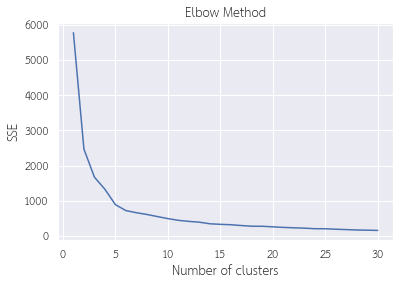

In [39]:
max_k = 31
sse = []
for i in range(1, max_k):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)
plt.plot(range(1, max_k), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

In [40]:
# Choose value for k
k = 2
cluster_predictions = kmeans.predict(df_normalized)
df2['cluster_id'] = cluster_predictions
df2.tail(10)

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,Human health activities,"Arts, entertainment and recreation",Other service activities,การค้าสินค้า (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี),การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),GPP Per capita (Baht),cluster_id
221,41043.546396,2899.227195,27403.129132,3111.698816,554.297695,4068.011079,26384.063098,7991.469595,48245.628635,1930.032403,...,5138.999363,508.745434,1075.152129,98.923618,8.183702,56.01964,34.75117,69428454,182370.921,2
222,11473.758834,138.027124,1957.128045,371.529415,121.660663,1091.745372,4245.207234,2723.866983,343.720920,203.949557,...,678.911569,91.089472,169.007921,98.923618,8.183702,56.01964,34.75117,69428454,103966.278,5
223,41356.720247,556.551961,7479.914652,789.938118,221.342815,2636.126394,14508.241217,1784.583250,876.838435,792.156963,...,2049.921273,109.183008,393.059838,98.923618,8.183702,56.01964,34.75117,69428454,176200.116,2
224,30863.258952,23657.208677,50886.917892,5815.106631,796.051425,10652.678834,31165.856810,11105.308281,8803.652420,2141.342809,...,7839.422206,344.215007,1887.248366,98.923618,8.183702,56.01964,34.75117,69428454,151918.153,2
225,11465.963653,248.790137,2639.661880,325.849776,85.456335,1340.710011,3878.023616,3137.065431,432.157455,266.381786,...,835.873537,38.932353,202.123829,98.923618,8.183702,56.01964,34.75117,69428454,107504.907,5
226,17771.818816,437.790121,8626.790381,829.751350,262.303583,2570.291279,8767.175555,4157.938631,1424.217001,701.086952,...,2914.618405,160.042469,568.877108,98.923618,8.183702,56.01964,34.75117,69428454,102589.216,16
227,11189.689953,206.400695,3656.593822,464.193649,92.299356,1556.598664,4729.234335,832.856811,139.369418,584.048311,...,1504.070534,73.376418,258.585120,98.923618,8.183702,56.01964,34.75117,69428454,73212.802,5
228,12041.010864,43.894939,4907.577404,474.050647,78.148166,1860.049233,5545.454736,884.163220,287.748654,454.823598,...,1562.829330,44.712292,522.738199,98.923618,8.183702,56.01964,34.75117,69428454,75696.575,5
229,13406.191563,247.362536,3433.734699,483.573083,95.485759,2416.885939,5391.912653,846.264895,863.693480,629.638691,...,1795.242799,79.663449,446.842829,98.923618,8.183702,56.01964,34.75117,69428454,91815.155,5
230,13890.460392,275.572869,2721.143509,395.374466,120.003269,2125.989541,4724.043327,816.428492,306.196019,514.164700,...,1655.367318,56.598834,575.151606,98.923618,8.183702,56.01964,34.75117,69428454,62065.683,5


In [41]:
df2.cluster_id.value_counts()

3     40
0     32
5     28
16    26
25    19
24    19
2      9
23     6
21     6
13     6
10     5
17     5
9      5
7      3
6      2
22     2
8      2
12     2
20     2
26     2
14     1
15     1
28     1
11     1
18     1
19     1
27     1
1      1
4      1
29     1
Name: cluster_id, dtype: int64

In [42]:
print(metrics.silhouette_score(df2,kmeans.labels_))

0.072552617931208


In [43]:
print(metrics.davies_bouldin_score(df2,kmeans.labels_))

1.297980114587919


In [44]:
df2[df2.cluster_id==0].mean()

Agriculture, forestry and fishing                                      9.149857e+03
Mining and quarrying                                                   8.608166e+02
Manufacturing                                                          4.651482e+03
Electricity, gas, steam and air conditioning supply                    6.794558e+02
Water supply; sewerage, waste management and remediation activities    1.184460e+02
Construction                                                           1.720129e+03
Wholesale and retail trade and repair of motor vehicles                4.329455e+03
Transportation and storage                                             1.045186e+03
Accommodation and food service activities                              3.324421e+02
Information and communication                                          2.727675e+02
Financial and insurance activities                                     2.477392e+03
Real estate activities                                                 1.495

In [45]:
df2[df2.cluster_id==1].mean()

Agriculture, forestry and fishing                                      2.413932e+03
Mining and quarrying                                                   0.000000e+00
Manufacturing                                                          5.946811e+05
Electricity, gas, steam and air conditioning supply                    3.822468e+04
Water supply; sewerage, waste management and remediation activities    2.289766e+04
Construction                                                           1.099380e+05
Wholesale and retail trade and repair of motor vehicles                1.104473e+06
Transportation and storage                                             3.839357e+05
Accommodation and food service activities                              4.477796e+05
Information and communication                                          2.756798e+05
Financial and insurance activities                                     7.159867e+05
Real estate activities                                                 1.020

In [46]:
df2[df2.cluster_id==2].mean()

Agriculture, forestry and fishing                                      4.218763e+04
Mining and quarrying                                                   4.745635e+03
Manufacturing                                                          2.697616e+04
Electricity, gas, steam and air conditioning supply                    4.516296e+03
Water supply; sewerage, waste management and remediation activities    5.352965e+02
Construction                                                           6.921270e+03
Wholesale and retail trade and repair of motor vehicles                2.482535e+04
Transportation and storage                                             6.356098e+03
Accommodation and food service activities                              1.037955e+04
Information and communication                                          1.764412e+03
Financial and insurance activities                                     1.068646e+04
Real estate activities                                                 5.944

In [47]:
df2[df2.cluster_id==3].mean()

Agriculture, forestry and fishing                                      1.101058e+04
Mining and quarrying                                                   7.659143e+02
Manufacturing                                                          6.916037e+03
Electricity, gas, steam and air conditioning supply                    8.431068e+02
Water supply; sewerage, waste management and remediation activities    1.772270e+02
Construction                                                           1.850483e+03
Wholesale and retail trade and repair of motor vehicles                5.510506e+03
Transportation and storage                                             2.399323e+03
Accommodation and food service activities                              3.773931e+03
Information and communication                                          3.897440e+02
Financial and insurance activities                                     2.857175e+03
Real estate activities                                                 1.772

In [48]:
df2[df2.cluster_id==4].mean()

Agriculture, forestry and fishing                                      1.839235e+04
Mining and quarrying                                                   2.487177e+05
Manufacturing                                                          4.134951e+05
Electricity, gas, steam and air conditioning supply                    5.653608e+04
Water supply; sewerage, waste management and remediation activities    2.365951e+03
Construction                                                           7.614219e+03
Wholesale and retail trade and repair of motor vehicles                6.606365e+04
Transportation and storage                                             1.784293e+04
Accommodation and food service activities                              3.208269e+03
Information and communication                                          1.391741e+03
Financial and insurance activities                                     1.090514e+04
Real estate activities                                                 5.399

#### หลังตัดปัจจัยที่ไม่ส่งผลออก